<a href="https://colab.research.google.com/github/jefersonjlima/mobile_robots_examples/blob/main/Chapter02/Notebooks/icp_lidar_tb3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.loadtxt("./data/int_00.csv")
data2 = np.loadtxt("./data/int_01.csv")
data3 = np.loadtxt("./data/int_02.csv")
data4 = np.loadtxt("./data/int_03.csv")

In [3]:
data1 = np.asarray(data1)
data2 = np.asarray(data2)
data3 = np.asarray(data3)
data4 = np.asarray(data4)

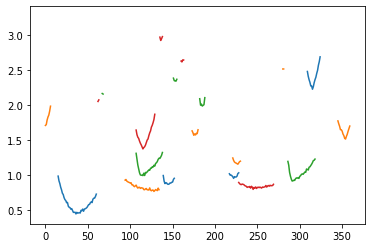

In [4]:
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.plot(data4)

In [5]:
x1 = []; y1 = []
for r,deg in zip(data1, enumerate(data1)):
    if r != np.inf:
        x1.append( r * np.cos( deg[0] * np.pi/180 ))
        y1.append( r * np.sin( deg[0] * np.pi/180 ))

x2 = []; y2 = []
for r,deg in zip(data2, enumerate(data2)):
    if r != np.inf:
        x2.append( r * np.cos( deg[0] * np.pi/180 ))
        y2.append( r * np.sin( deg[0] * np.pi/180 ))

x3 = []; y3 = []
for r,deg in zip(data3, enumerate(data3)):
    if r != np.inf:
        x3.append( r * np.cos( deg[0] * np.pi/180 ))
        y3.append( r * np.sin( deg[0] * np.pi/180 ))

x4 = []; y4 = []
for r,deg in zip(data4, enumerate(data4)):
    if r != np.inf:
        x4.append( r * np.cos( deg[0] * np.pi/180 ))
        y4.append( r * np.sin( deg[0] * np.pi/180 ))


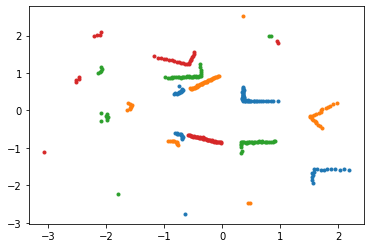

In [6]:
plt.plot(x1,y1, '.')
plt.plot(x2,y2, '.')
plt.plot(x3,y3, '.')
plt.plot(x4,y4, '.')

In [7]:
x, y = x1, y1

## Rotation and Translation: $\mathbf{T}(\theta, Q)$

${}^A\mathbf{P} = \mathbf{T}(\theta, Q) {}^B\mathbf{P} = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 & q_x\\
\sin(\theta) & \cos(\theta) & 0 & q_y\\
0 & 0 & 1 & q_z\\ 
0 & 0 & 0 & 1\\
\end{bmatrix}.
\begin{bmatrix}
{}^Bp_x & ..\\
{}^Bp_y & ..\\
{}^Bp_z & ..\\
1 & ..
\end{bmatrix}$

In [8]:
def tf(theta, S, Q, angle = 'rad'):
    if angle == 'deg':
        theta = np.deg2rad(theta)
    th_matrix = np.array([[np.cos(theta),   -np.sin(theta), 0.,      Q[0]],
                          [np.sin(theta),   np.cos(theta),  0.,      Q[1]],
                          [0.,        0.,                   1.,      Q[2]],
                          [0.,        0.,                   0.,      S]])
    return th_matrix

In [9]:
# add scale and translation
len_points = len(x)
m_points = np.array([[x[0]], [y[0]], [0], [1]])
for i in range(1, len_points):
    m_points = np.hstack((m_points,  np.array([[ x[i] ],[  y[i]  ],[0], [1]])))

In [10]:
Q = np.array([0.3, 0.2, 0.0])
theta = 10
out = tf(theta, 1.0, Q, angle = 'deg') @ m_points
# out = tf(0, 1.0, Q, angle = 'deg') @ out
zro = tf(theta, 1.0, Q, angle = 'deg') @ np.array([[0],[0],[0],[1]])
# zro = tf(0, 1.0, Q, angle = 'deg') @ zro

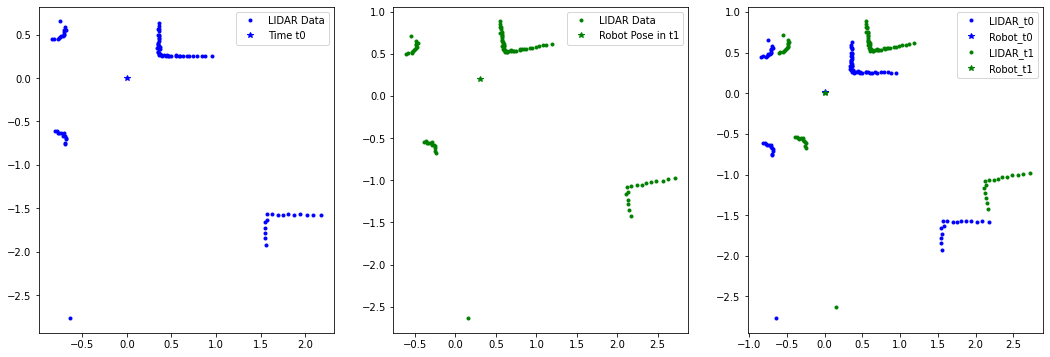

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (6*3,6))
ax1.plot(x,y, 'b .')
ax1.plot(0,0, 'b *')
ax1.legend(["LIDAR Data","Time t0"])
ax2.plot(out[0,:], out[1,:],'g .')
ax2.plot(zro[0],zro[1], 'g *')
ax2.legend(["LIDAR Data","Robot Pose in t1"])
ax3.plot(x,y, 'b .')
ax3.plot(0.01,0.01, 'b *')
ax3.plot(out[0,:], out[1,:],'g .')
ax3.plot(0,0, 'g *')
ax3.legend(["LIDAR_t0","Robot_t0", "LIDAR_t1","Robot_t1"])

In [30]:
Q = np.array([0, 0, 0])
theta = 0
#       theta, scale, Q
H_ = tf(theta, 1.0, Q, angle = 'deg')
print(np.round(H_,2))


[[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [39]:
Q = np.array([1.0, 0.0, 0.0])
theta = 0

In [14]:
import icp_example

In [15]:
previous_points = np.vstack((out[0,:], out[1,:]))
current_points = np.vstack((x, y))

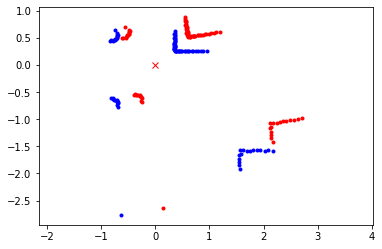

Residual: 38.21263014739254


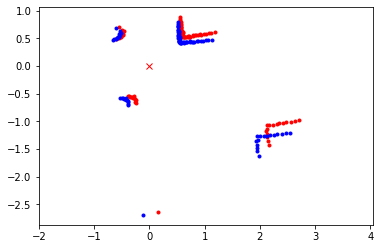

Residual: 12.461947325486989


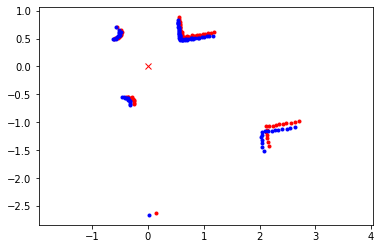

Residual: 6.027516249597935


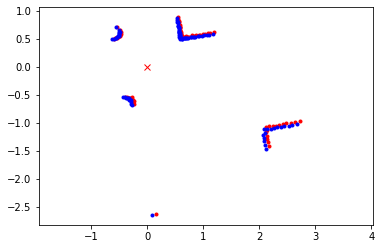

Residual: 3.227829200403457


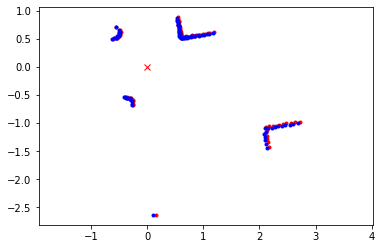

Residual: 1.8803376927632716


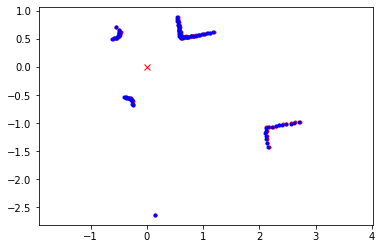

Residual: 0.834467778994669


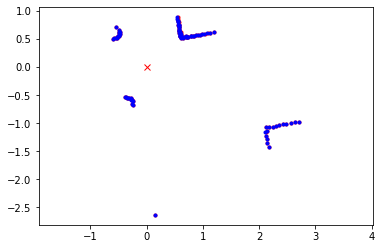

Residual: 0.09515127948551916


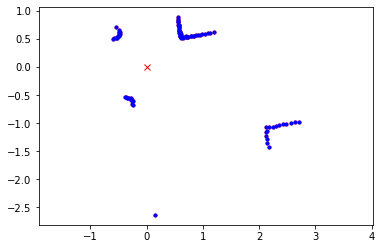

Residual: 5.76150219439513e-14


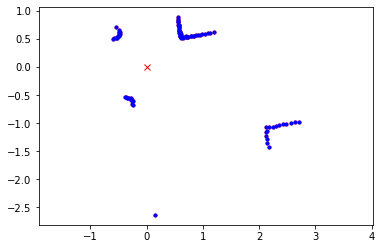

Residual: 4.805446164368109e-14
Converge 4.805446164368109e-14 9.560560300270216e-15 9


In [16]:
R, T = icp_example.icp_matching(previous_points, current_points)

In [17]:
print("--Prediction--")
print(
np.round(
np.array([
    [R[0,0] ,R[0,1] ,0      , T[0]  ],
    [R[1,0] ,R[1,1] ,0      , T[1]  ],
    [0      ,0      ,1      , 0     ],
    [0      ,0      ,0      ,1      ]
]), 2))
print("--Real--")
print(np.round(tf(theta, 1.0, Q, angle = 'deg'),2))

--Prediction--
[[ 0.98 -0.17  0.    0.3 ]
 [ 0.17  0.98  0.    0.2 ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]]
--Real--
[[ 0.98 -0.17  0.    0.3 ]
 [ 0.17  0.98  0.    0.2 ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]]


In [29]:
A = (np.vstack((x1,y1)).copy())
B = (np.vstack((out[0,:],out[1,:])).copy())

# B = B[:,0:-20]

A.shape, B.shape

((2, 89), (2, 89))

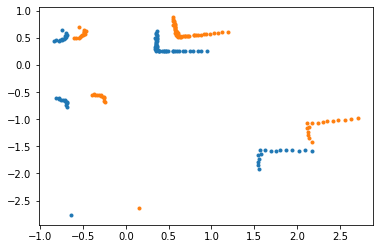

In [30]:
plt.plot(A[0,:], A[1,:],'.')
plt.plot(B[0,:], B[1,:],'.')

In [31]:
ca = np.mean(A, axis=1).reshape(-1, 1)
cb = np.mean(B, axis=1).reshape(-1, 1)
A = A - ca
B = B - cb

In [32]:
y = [i for i in range(len(x1))]
y = np.array(y).T

In [33]:
A.shape[1]

89

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

In [35]:
classifier.fit(A.T,y)

KNeighborsClassifier(n_neighbors=1)

In [37]:
classifier.predict(A.T)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88])

In [38]:
k = classifier.predict(B.T)

In [39]:
k

array([ 2,  3,  4,  5,  6,  7,  9, 11, 11, 12, 14, 16, 17, 19, 20, 22, 22,
       21, 21, 21, 26, 26, 26, 26, 26, 26, 26, 30, 30, 30, 30, 30, 30, 33,
       34, 34, 37, 37, 40, 40, 40, 40, 43, 43, 43, 44, 59, 58, 57, 59, 59,
       57, 59, 59, 59, 59, 59, 59, 59, 59, 71, 71, 71, 71, 71, 71, 71, 71,
       71, 71, 71, 71, 72, 84, 83, 83, 83, 83, 83, 83, 83, 85, 85, 86, 87,
       88, 88, 88, 88])

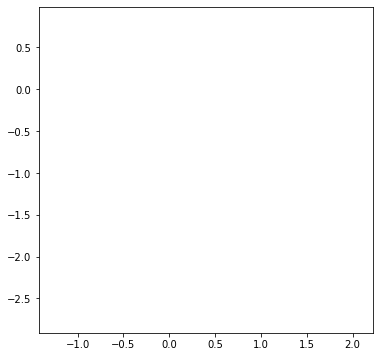

In [40]:
from celluloid import Camera # getting the camera
from IPython.display import HTML

fig, ax1 = plt.subplots(1, 1, figsize = (6*1,6))
camera = Camera(fig)# the camera gets our figure

for kk in np.unique(k):
    ax1.plot(A[0,:], A[1,:], 'b .');
    ax1.plot(B[0,:], B[1,:], 'r .');
    ax1.plot(B[0,k==kk], B[1, k==kk], 'x');
    ax1.plot(A[0,kk], A[1,kk], 'x');
    ax1.legend(["A data","B data", str(kk)]);
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())

In [42]:
ca = np.mean(A, axis=1).reshape(-1, 1)
cb = np.mean(B, axis=1).reshape(-1, 1)
# A - ca, B - cb

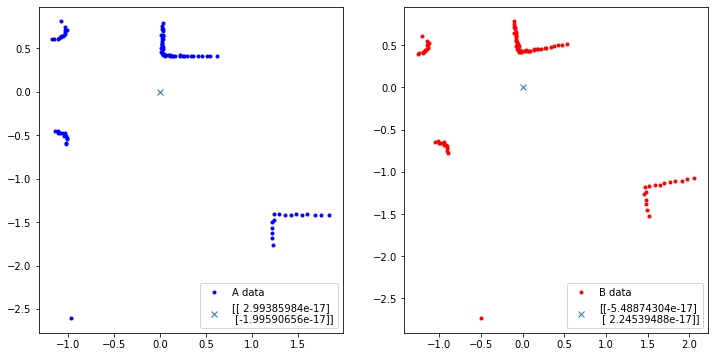

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6*2,6))
ax1.plot(A[0,:], A[1,:], 'b .')
ax1.plot(ca[0], ca[1], 'x')
ax1.legend(["A data",str(ca)])
ax2.plot(B[0,:], B[1,:], 'r .')
ax2.plot(cb[0], cb[1], 'x')
ax2.legend(["B data",str(cb)])

In [44]:
d = np.linalg.norm(A[:,k].T - B.T)
d

1.4115446487038872

In [45]:
A[:,k].shape, B.shape

((2, 89), (2, 89))

In [47]:
Am = A - ca
Bm = B - cb
U, s, Vt = np.linalg.svd(Am @ Bm.T)

In [48]:
R = (Vt.T @ U.T)

In [49]:
T = -(R @ ca) + cb

In [50]:
A = (R @ Am)

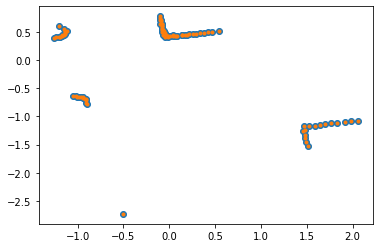

In [51]:
plt.plot(A[0,:], A[1,:],'o')
plt.plot(B[0,:], B[1,:],'.')

In [52]:
R

array([[ 0.98480775, -0.17364818],
       [ 0.17364818,  0.98480775]])

In [53]:
T

array([[-8.78370496e-17],
       [ 3.69110083e-17]])